In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.read_csv(r'C:\Users\Yogi\Desktop\Fuel_Consumption_Ratings.csv',encoding='unicode_escape')
df1 = df[['Engine Size','Cylinders','Fuel Consumption','CO2 Emissions']].dropna()
df1.sample(10)

,Engine Size,Cylinders,Fuel Consumption,CO2 Emissions
223,6.2,8.0,17.1,340
158,2.0,4.0,11.9,235
1003,4.6,8.0,16.8,354
515,3.0,6.0,13.3,277
53,2.0,4.0,10.3,213
257,3.6,6.0,12.4,242
883,3.0,6.0,12.2,246
440,1.5,4.0,7.7,162
474,1.6,4.0,10.3,218
707,3.0,6.0,11.2,232


In [4]:
df.columns

Index(['Model', 'Make', 'Model.1', 'Vehicle Class', 'Engine Size', 'Cylinders',
       'Transmission', 'Fuel', 'Fuel Consumption', 'Unnamed: 9',
       ...
       'Unnamed: 211', 'Unnamed: 212', 'Unnamed: 213', 'Unnamed: 214',
       'Unnamed: 215', 'Unnamed: 216', 'Unnamed: 217', 'Unnamed: 218',
       'Unnamed: 219', 'Unnamed: 220'],
      dtype='object', length=221)

In [5]:
df1.describe()

,Cylinders
count,1046.000000
mean,5.595602
std,1.796845
min,3.000000
25%,4.000000
50%,6.000000
75%,6.000000
max,16.000000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 1 to 1046
Data columns (total 4 columns):
Engine Size         1046 non-null object
Cylinders           1046 non-null float64
Fuel Consumption    1046 non-null object
CO2 Emissions       1046 non-null object
dtypes: float64(1), object(3)
memory usage: 40.9+ KB


In [7]:
df1 = df1.astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 1 to 1046
Data columns (total 4 columns):
Engine Size         1046 non-null float64
Cylinders           1046 non-null float64
Fuel Consumption    1046 non-null float64
CO2 Emissions       1046 non-null float64
dtypes: float64(4)
memory usage: 40.9 KB


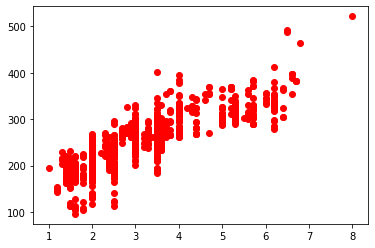

In [8]:
 plt.scatter(df1['Engine Size'],df1['CO2 Emissions'],color='r')
plt.show()

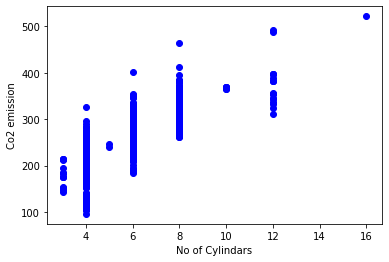

In [9]:
plt.scatter(df1['Cylinders'],df1['CO2 Emissions'],color='b')
plt.xlabel('No of Cylindars')
plt.ylabel('Co2 emission')
plt.show()

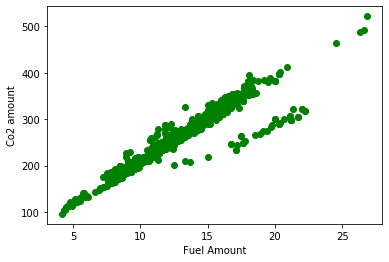

In [10]:
plt.scatter(df1['Fuel Consumption'],df1['CO2 Emissions'],color='g')
plt.xlabel('Fuel Amount')
plt.ylabel('Co2 amount')
plt.show()

In [11]:
msk = np.random.rand(len(df1)) < 0.8
train = df1[msk]
test = df1[~msk]
print(train,test)

      Engine Size  Cylinders  Fuel Consumption  CO2 Emissions
1             2.4        4.0               9.9          199.0
2             3.5        6.0              12.2          252.0
3             3.5        6.0              12.2          258.0
4             3.0        6.0               9.1          210.0
5             3.5        6.0              11.1          261.0
...           ...        ...               ...            ...
1040          2.0        4.0              11.1          219.0
1041          2.0        4.0              11.6          233.0
1042          2.0        4.0              10.3          211.0
1043          2.0        4.0              11.3          233.0
1045          2.0        4.0              11.3          233.0

[855 rows x 4 columns]       Engine Size  Cylinders  Fuel Consumption  CO2 Emissions
12            3.5        6.0              12.0          240.0
23            5.2       12.0              16.4          324.0
28            2.0        4.0              10.9

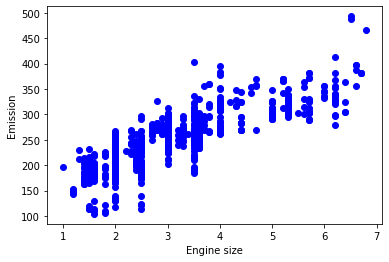

In [12]:
plt.scatter(train['Engine Size'], train['CO2 Emissions'],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [13]:
lregr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine Size']])
train_y = np.asanyarray(train[['CO2 Emissions']])
lregr.fit(train_x,train_y)
print ('Coefficients: ', lregr.coef_)
print ('Intercept: ',lregr.intercept_)

Coefficients:  [[36.42346616]]
Intercept:  [138.27369837]


Text(0, 0.5, 'Emission')

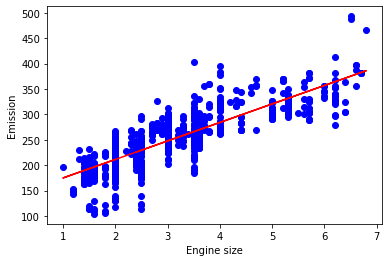

In [14]:
plt.scatter(train['Engine Size'], train['CO2 Emissions'],  color='blue')
plt.plot(train_x, lregr.coef_[0][0]*train_x + lregr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Linear Regression

In [15]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Engine Size']])
test_y = np.asanyarray(test[['CO2 Emissions']])
test_y_hat = lregr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 23.28
Residual sum of squares (MSE): 912.93
R2-score: 0.63


In [16]:
lregr1 = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Fuel Consumption']])
train_y = np.asanyarray(train[['CO2 Emissions']])
lregr1.fit(train_x,train_y)
print ('Coefficients: ', lregr1.coef_)
print ('Intercept: ',lregr1.intercept_)

Coefficients:  [[16.11381615]]
Intercept:  [51.97087321]


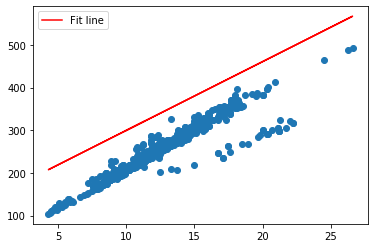

In [17]:
plt.scatter(train['Fuel Consumption'],train['CO2 Emissions'])
plt.plot(train_x,lregr1.coef_[0][0]*train_x+lregr.intercept_[0],'-r',label='Fit line')
plt.legend()

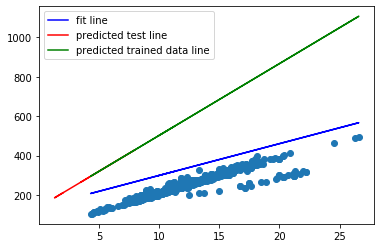

In [18]:
plt.scatter(train['Fuel Consumption'],train['CO2 Emissions'])
plt.plot(train_x,lregr1.coef_[0][0]*train_x+lregr.intercept_[0],'b',label='fit line')
plt.plot(test_x,lregr.predict(test_x),label='predicted test line',c='r')
plt.plot(train_x,lregr.predict(train_x),label='predicted trained data line',c='g')
plt.legend()

In [19]:
mlregr = linear_model.LinearRegression()
mlr_x = np.asanyarray(train[['Fuel Consumption','Cylinders','Engine Size']]) 
mlr_y = np.asanyarray(train['CO2 Emissions'])
mlregr.fit(mlr_x,mlr_y)
print(mlregr.coef_,mlregr.intercept_)
#print(mlregr.coef_.shape)

[13.27633567  2.64873099  5.06478937] 56.57914388868025


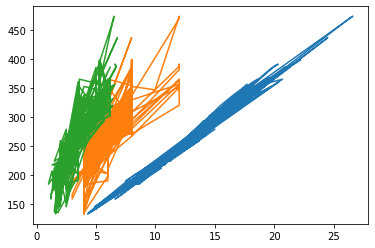

In [24]:
plt.plot(mlr_x,mlregr.predict(train[['Fuel Consumption','Cylinders','Engine Size']]))

In [ ]:
mlregr.predict(train[['Fuel Consumption','Cylinders','Engine Size']])

In [ ]:
for i in mlregr.coef_:
    print(i)

In [ ]:
plt.plot(mlr_x,mlr_x*mlregr.coef_[0]+mlr_x*mlregr.coef_[1]+mlr_x*mlregr.coef_[2]+mlregr.intercept_)
plt.plot(mlr_x,mlregr.predict(mlr_x))

In [ ]:
test

In [ ]:
mlregr.predict([[2,4,10]])

## Polynomial Regression

In [22]:
training_data_set = np.random.rand(len(df1))< 0.8
test_data_set = df1[~training_data_set]
training_data_set= df1[training_data_set]
print(test_data_set,training_data_set)

      Engine Size  Cylinders  Fuel Consumption  CO2 Emissions
2             3.5        6.0              12.2          252.0
6             2.0        4.0              11.0          232.0
13            1.8        4.0               9.7          197.0
16            2.0        4.0              10.5          217.0
17            2.9        6.0              13.8          280.0
...           ...        ...               ...            ...
1031          2.0        4.0              10.7          221.0
1032          2.0        4.0              11.1          228.0
1040          2.0        4.0              11.1          219.0
1044          2.0        4.0              11.8          242.0
1045          2.0        4.0              11.3          233.0

[214 rows x 4 columns]       Engine Size  Cylinders  Fuel Consumption  CO2 Emissions
1             2.4        4.0               9.9          199.0
3             3.5        6.0              12.2          258.0
4             3.0        6.0               9.1

In [25]:
training_data_set_x = training_data_set['Engine Size']
training_data_set_y = training_data_set['CO2 Emissions']
test_data_set_x = test_data_set['Engine Size']
test_data_set_y = test_data_set['CO2 Emissions']
polynomial_to_linear = PolynomialFeatures(degree=2)
polynomial_to_linear_x = polynomial_to_linear.fit_transform([training_data_set_x]) 
polynomial_regression = linear_model.LinearRegression()
polynomial_regression.fit(polynomial_to_linear_x,training_data_set_x)

ValueError: Found input variables with inconsistent numbers of samples: [1, 832]

## Classification 

### KNN

In [69]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [27]:
c_df = pd.read_csv(r'C:\Users\Yogi\Downloads\telecustsclasses\teleCust1000t.csv')
c_df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [29]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
region     1000 non-null int64
tenure     1000 non-null int64
age        1000 non-null int64
marital    1000 non-null int64
address    1000 non-null int64
income     1000 non-null float64
ed         1000 non-null int64
employ     1000 non-null int64
retire     1000 non-null float64
gender     1000 non-null int64
reside     1000 non-null int64
custcat    1000 non-null int64
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [30]:
c_df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [35]:
c_df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [41]:
X = c_df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
type(X)

numpy.ndarray

In [52]:
y = c_df['custcat'].values
type(y)

numpy.ndarray

In [45]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [57]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size= 0.2, random_state=4)
print(train_x,train_y)

[[-1.25277087 -1.52352817 -0.85114279 ... -0.22207644 -1.03459817
   1.85983368]
 [-0.02696767  0.2564039   0.34383492 ... -0.22207644 -1.03459817
   1.85983368]
 [-1.25277087 -0.77408309 -0.69181243 ... -0.22207644 -1.03459817
   1.85983368]
 ...
 [ 1.19883553 -1.47668785 -0.85114279 ... -0.22207644 -1.03459817
  -0.23065004]
 [ 1.19883553  1.38057152  1.29981709 ... -0.22207644  0.96655883
  -0.23065004]
 [ 1.19883553 -1.00828468  0.4235001  ... -0.22207644 -1.03459817
  -0.23065004]] [4 4 3 1 3 1 1 1 1 3 3 1 2 4 4 3 1 1 3 1 4 4 4 2 1 1 1 1 3 3 2 3 2 4 4 4 3
 4 3 4 3 4 3 2 3 3 2 2 3 4 3 1 4 4 3 4 1 4 1 2 1 3 4 3 3 3 1 1 2 4 3 3 2 1
 1 1 2 1 3 3 2 4 3 1 1 2 1 3 4 4 3 4 3 4 1 1 3 3 1 1 1 1 4 3 4 4 1 4 2 1 3
 1 4 3 2 3 3 3 2 1 4 3 3 4 2 2 2 1 2 3 3 1 1 1 1 3 3 4 2 2 4 4 1 3 1 3 3 2
 3 1 2 2 1 3 3 3 3 3 3 1 3 3 1 1 1 4 2 4 1 1 3 2 1 4 3 3 3 1 3 3 3 1 2 3 3
 4 1 4 3 1 4 3 3 1 1 1 2 3 2 1 4 2 1 1 3 4 4 3 2 1 4 2 2 3 2 4 2 1 2 2 4 2
 2 2 4 1 4 4 4 2 3 3 1 1 2 4 4 1 1 3 1 4 3 3 4 4 4 1 4 4 2

In [62]:
k = 4
kneighbor = KNeighborsClassifier(n_neighbors = k).fit(train_x,train_y)
kneighbor

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [65]:
predicted_in_sample = kneighbor.predict(test_x)
for i in predicted_in_sample:
    print(i)

1
1
3
2
4
3
3
2
2
4
1
4
2
1
3
1
3
4
3
4
3
3
3
1
1
3
1
1
1
2
1
1
4
4
3
2
3
1
2
3
1
4
2
1
2
1
4
1
4
4
2
1
2
3
2
3
3
3
4
1
1
4
2
3
3
1
1
2
2
1
1
3
4
3
2
1
4
2
2
3
3
1
2
4
4
2
3
4
1
1
2
2
1
1
1
1
2
2
3
1
1
4
1
1
1
4
2
2
2
2
1
3
2
4
1
2
1
1
2
3
4
2
2
3
1
1
2
3
1
3
3
1
1
4
2
2
2
1
1
3
1
1
4
1
1
2
1
3
2
2
1
2
2
3
2
3
3
3
3
2
3
1
1
1
3
4
1
1
3
1
3
3
1
2
2
2
1
1
1
1
1
1
1
2
3
1
1
1
4
4
3
1
1
3
3
4
1
4
3
3


In [70]:
print("Train set Accuracy: ", metrics.accuracy_score(train_y, kneighbor.predict(train_x)))
print("Test set Accuracy: ", metrics.accuracy_score(test_y, predicted_in_sample))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32
